In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from miscellaneous.utils import \
    adjust_timestamps_to_match_local_timezone, \
    compute_cadr, \
    compute_relative_risk_reduction_per_row, \
    compute_overall_fit_factor, \
    relative_risk_reduction

# AirGo: Clean Air on the Go

## Introduction

<div style="display: flex; justify-content: center;">
    <img src="https://breathesafe-airgo.s3.us-east-2.amazonaws.com/images/edderic-wearing-airgo.jpeg" width="500" alt='Edderic wearing the AirGo device'/>
</div>



COVID-conscious people like me take precautions to lower our risk of getting COVID which can result in Long COVID and multi-organ damage, or even death.

<div>
<img src="https://www.ncbi.nlm.nih.gov/pmc/articles/instance/9839201/bin/41579_2022_846_Fig1_HTML.jpg" width="500" alt='Long COVID affects many organs'/>
</div>



Wearing N95 and/or elastomeric masks is one of the best among the many ways to protect oneself. However, there are some cases where this is challenging to do: at the dentist, or at indoor dining venues.

<div style="display: flex; flex-direction: row;">
    <img src="https://www.johnmartindental.com/wp-content/uploads/2019/08/Family-Dentistry-St.-Louis-MO.jpg" alt="Dentist wearing surgical mask treats a child" width='500'>
    <img src="https://www.posist.com/restaurant-times/wp-content/uploads/2017/11/Effective-Strategies-To-Improve-Your-Restaurant-Service-And-Provide-A-Stellar-Guest-Experience.jpg" alt="A couple sitting down in a restaurant, getting served by a waiter" width='500'>
</div>



I designed AirGo to so that:

<ul>
    <li>👔 it's wearable. Get clean air, on the go.</li>
    <li>🔋 it has long battery life.</li>
    <li>⛨ high protection for the wearer, relative to regular air cleaners, cloth, and surgical masks.</li>
    <li>🫦 While at rest, the mouth area can be accessible (for dental cleaning, eating, etc.). 
    <li>🛡️ Detachable visor gives reliably high concentration of clean air for those people walking around with the device indoors.
    </li>
    <li>😷 Can use this as part of a multi-layered strategy. Doing something where you can use a respirator? Can have this blowing at your face while you also wear a respirator!</li>
</ul>

## SARS-CoV-2 is airborne

SARS-CoV-2, the virus that causes COVID-19, is airborne. The virus travels in very small particles that float in the air, called aerosols. [Fine particles with the size of 8 microns or less harbor viruses like SARS-CoV-2](https://www.tandfonline.com/doi/full/10.1080/23744235.2022.2140822), which can then be inhaled as they can be suspended in the air for a long time. Reducing the amount of particles that can be inhaled through ventilation, filtration, and masking is key.

![Size Distribution of Aerosols Containing SARS-CoV-2](https://breathesafe-airgo.s3.us-east-2.amazonaws.com/images/size-distribution.png)

The goal, then is to significantly reduce the amount of aerosols inhaled under 8 micrometers (microns), while:
- keeping the mouth easily accessible
- maintaining mobility for the user, and not having to depend on a tight-fitting seal, a hood that covers the whole head, as in designs of Powered Air Purifying Respirators (PAPRs) that are currently in the market.

Examples of existing PAPRs:

<div>
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSiya4tBGuWJ3hetBrfJdGt7ltIc95l7St59g&usqp=CAU" alt='tight-fitting PAPR'>
</div>

[Versaflo selling for $1800 USD](https://www.grainger.com/product/475M36?gucid=N:N:PS:Paid:GGL:CSM-2295:4P7A1P:20501231&gclid=Cj0KCQjw0bunBhD9ARIsAAZl0E1okfJMnEGKfqKOPqwD0EvhxM_mzQR8l_W2LYGbzwV7ve1kRr8jbKcaAj0lEALw_wcB&gclsrc=aw.ds):
<div>
    <img src="https://breathesafe-airgo.s3.us-east-2.amazonaws.com/images/versaflow-system.png" alt="Versaflow" width='500'>
</div>



## Methods

To test the relative reduction in small particles, I used aerosolized salt (NaCl) using an ultrasonic humidifier. I used SPS30 to measure the mass concentration of salt in the air. In some cases, I used a fan running at 1.0 m/s, directed at the device to test the robustness of the device with respect to wind (e.g. when walking). Here's a picture showing the setup:


<div>
    <img src="https://breathesafe-airgo.s3.us-east-2.amazonaws.com/images/testing.jpeg" width='500'>
</div>

### Production of Aerosols

#### Aqueous Solution of Salt as an Aerosol Source

I used [Rob Wissman's instructions](https://twitter.com/robwiss/status/1594196669649735680) to create the mixture. He mentioned that in the [Dal Porto, Cappa, Corsi paper](https://www.tandfonline.com/doi/full/10.1080/02786826.2022.2054674), they used an aqueous salt solution of 100g / 1L to test Corsi-Rosenthal boxes. In the blog post linked in Rob's instructions, he mentioned that using regular salt has iodine, which makes it harder to aerosolize. Instead he recommends using a Kosher salt and distilled water to make the mixture as an option, and this is what I did.

\begin{equation}
\begin{aligned}
  100 g / L &=  100 g / L \cdot 1L \text{ }H_{2}O  / 4.22675 \text{cups }H_{2}O \\
  &= 100g \text{ salt} / 4.22675 \text{ cups water} \\
  &= 23.658g \text{ salt} / 1 \text{ cup water}
\end{aligned}
\end{equation}

I didn't have access to weight scale, so I looked up the conversion of mass to volume for Kosher salt. There is 288 grams of salt per 1 cup.
\begin{equation}
\begin{aligned}
  23.658g \text{ salt} / 1 \text{ cup water} \cdot 1 \text{ cup} / 288 g &= 0.08215 \text{ cups salt} / 1 \text{ cup water} \\
  &= 0.08215 \text{ cups salt} / 1 \text{ cup water} \cdot 48 \text{ tsp} / 1 \text{ cup} \\
  &= 3.9432 \text{ tsp salt} / 1 \text{ cup water}
\end{aligned}
\end{equation}

I rounded up and used 4 teaspoons of Kosher salt for the 1 cup of water.

#### Aerosolization of Salt

Instead of the Wellue nebulizer described in the [Dal Porto, Cappa, Corsi paper](https://www.tandfonline.com/doi/full/10.1080/02786826.2022.2054674) paper and  in [Rob Wissman's instructions](https://twitter.com/robwiss/status/1594196669649735680), I used an ultrasonic humidifier. The humidifier releases the salt solution in the air. The water evaporates, which then creates fine particulate matter, which can be suspended in the air for hours.

### Detection of Aerosols

<div>
    <img src="https://mm.digikey.com/Volume0/opasdata/d220001/medias/images/822/MFG_SPS30.jpg" width='300'>
</div>


I used the [Sensirion SPS-30](https://mm.digikey.com/Volume0/opasdata/d220001/medias/images/822/MFG_SPS30.jpg) device. It gives readings of mass concentrations (micrograms per cubic meters: µg / m3) in several bins of sizes: PM 0.3-PM 1.0, PM 0.3-PM 2.5, PM 0.3-PM 4, and PM 0.3-PM 10. I used the PM 0.3-PM 1.0 for measurements because SPS30 is known to be very accurate for readings under PM 1.0 for detecting aerosolized salt. Here's a graph taken from [Sousan et al, 2021](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8233711/), showing that SPS30 is very accurate for PM 1.0 readings across high concentrations, unlike other devices. It matches the [$30,000 USD GRIMM MiniWRAS](https://www.google.com/search?q=miniwras+cost&rlz=1C5GCEM_enUS1035US1035&oq=miniwras+cost&gs_lcrp=EgZjaHJvbWUyBggAEEUYOTIJCAEQABgNGIAEMgoIAhAAGAUYDRgeMgoIAxAAGAUYDRgeMgoIBBAAGAUYDRgeMgoIBRAAGAUYDRgeMgoIBhAAGAUYDRgeMgoIBxAAGAUYDRgeMgoICBAAGAUYDRgeMgwICRAAGAUYChgNGB7SAQg0NDEyajBqN6gCALACAA&sourceid=chrome&ie=UTF-8) reference instrument quite well for PM 1.0:

<div>
    <img src="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8233711/bin/sensors-21-04146-g003.jpg" width='500'>
</div>

### Testing Procedure

#### Environment

Testing was done in a small bathroom, with the door closed, bathroom fan turned off, and no windows. This was to ensure that the changes in PM readings in a short amount of time are due to the AirGo device being turned on, and we can attribute the change in PM readings as a causal effect of the AirGo device. 

#### Steps:

1. Turn on the ultrasonic humidifier.
2. Mix the air, either with a fan, or with a towel swaying vigorously.
3. Turn off the ultrasonic humidifier as long as the readings are consistently over 200 µg / m3.
4. Mix the air some more so that the readings start to consistently hover around some value.
5. Software samples for 5 seconds while the device is turned off.
6. Turn on the device. Sample for 5 seconds. 


### Analysis
#### Relative reduction: 

Relative reduction tells us how much of the original amount was reduced after having turned on the AirGo device. The higher the better. 

In other words: 

$$
\begin{equation}
\begin{aligned}
\text{Relative Reduction} &= \frac{C_o - C_i}{C_o} \\
\end{aligned}
\end{equation}
$$


where $Co$ is the concentration in ambient air, while $Ci$ is the concentration inhaled from the device. 

Instead of using just one value to represent $Co$ and another value to represent $C_i$ took the average of measurements since the statistical bias (on average, how off is it from the true average) is basically 0, as shown from Sousan et. al (2021) for aerosolized salt (though Sousan et. al used I think an hour's worth of data for averaging instead of 5 seconds worth as I did here).

Here are the steps:

1. Take the average of the readings while the device was turned off.
2. Take the average of the readings while the device was turned on.
3. Subtract step 1 output from the step 2 output.
4. Divide that by the output of Step 1.






$$
\begin{equation}
\begin{aligned}
\text{Relative Reduction} 
    &= \frac{
	\frac{\sum_{i=1}^5 \text{PM1.0(device off, i)}}{5} - \frac{\sum_{i=1}^5 \text{PM1.0(device on, i)}}{5}
} {\frac{\sum_{i=1}^5 \text{PM1.0(device off, i)}}{5}}
\end{aligned}
\end{equation}
$$

N95s, when there are no leaks around the face, reduce the inhaled aerosols by at least 95%, (i.e. 95% relative reduction). 95% reduction of aerosols (or close to it) is what I was hoping to achieve with this device.

#### Fit Factor

Fit factor, as [defined by OSHA](https://www.osha.gov/sites/default/files/publications/3352-APF-respirators.pdf), is as follows:
> A quantitative estimate of the fit of a particular respirator to a specific individual and typically
estimates the ratio of the concentration of a substance in ambient air to its concentration inside the
respirator when worn.

$$
\begin{equation}
\begin{aligned}
	\text{Fit Factor} &= C_o / C_i
\end{aligned}
\end{equation}
$$


where $Co$ is the concentration in ambient air, while $C_i$ is the concentration inhaled from the device.

Relative Reduction and Fit Factor can be related as follows:

$$
\begin{equation}
\begin{aligned}
	\text{Fit Factor} &= \frac{1}{1 - \text{Relative Reduction}}
\end{aligned}
\end{equation}
$$


So a tight-fitting N95 respirator at the very least can filter out 95% of particles -- a relative reduction of 95%. Thus the corresponding fit factor is $\frac{1}{1 - 0.95} = \frac{1}{0.05} = 20$.

#### Overall Fit Factor

To compute the overall fit factor, we take the harmonic mean:

$$
\begin{equation}
\begin{aligned}
	\text{Overall Fit Factor} &= \frac{N} {\frac{1}{FF_1} + \frac{1}{FF_2} + ... + \frac{1}{FF_{N-1}} + \frac{1}{FF_N}}
\end{aligned}
\end{equation}
$$



## Computations

In [2]:
metadata = pd.read_csv('../air_cleaner_data/personal-air-cleaner-experiments - Sheet1.csv', parse_dates=['start_time', 'end_time'])

In [3]:
metadata.head(5)

,start_time,Distance (in),Experiment,end_time,competing airflow (m/s),Fan,shroud,spacing (in),push filters,pull filters,filepath,Speed dial (%),visor
0,2023-03-26 21:34:45.239273,4,"blower, 1 QT3 HEPA, NCAF",2023-03-10 09:46:33.000000,False,blower,False,2.0,1 QT3 HEPA,NaN,../air_cleaner_data/2023-03-10_09-24-21-SPS3x_...,NaN,NaN
1,2023-03-26 21:39:29.013405,4,"blower, 1 QT3 HEPA, NCAF",2023-03-26 21:39:36.282274,False,blower,False,2.0,1 QT3 HEPA,NaN,../air_cleaner_data/2023-03-10_09-24-21-SPS3x_...,NaN,NaN
2,2023-06-12 13:01:22.083800,2,"2 QT3, NF-F12 iPPC-3000 full speed",2023-06-12 13:02:28.077759,NaN,NF-F12 iPPC-3000 Industrial,False,NaN,2 QT3 HEPA,NaN,../air_cleaner_data/2023-06-12_08:46:02.198914...,NaN,NaN
3,2023-06-12 13:03:29.802904,4,"2 QT3, NF-F12 iPPC-3000 full speed",2023-06-12 13:04:10.674973,NaN,NF-F12 iPPC-3000 Industrial,False,NaN,2 QT3 HEPA,NaN,../air_cleaner_data/2023-06-12_08:46:02.198914...,NaN,NaN
4,2023-06-12 13:04:55.906925,6,"2 QT3, NF-F12 iPPC-3000 full speed",2023-06-12 13:05:33.750074,NaN,NF-F12 iPPC-3000 Industrial,False,NaN,2 QT3 HEPA,NaN,../air_cleaner_data/2023-06-12_08:46:02.198914...,NaN,NaN


In [4]:
csv_metadata = metadata[metadata['Experiment'].str.contains('AirGo QT3')].copy()

adjust_timestamps_to_match_local_timezone(['start_time', 'end_time'], csv_metadata, delta='4 hours')
csv_metadata['relative_reduction_pm1_0_mass_conc'] = csv_metadata.apply(compute_relative_risk_reduction_per_row, axis=1)
csv_metadata['speed'] = csv_metadata['Speed dial (%)'].astype('object')

agg = compute_overall_fit_factor(
    df=csv_metadata,
    groupby=['Experiment', 'speed', 'competing airflow (m/s)', 'visor'],
    reduction_col='relative_reduction_pm1_0_mass_conc'
)

/Users/eugaddan/Developer/breathesafe/python/miscellaneous/utils.py:76: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg = df.groupby(groupby).sum()[['1/ff']].rename(columns={'1/ff': 'sum 1/ff'})


### Overall Fit Factor

I tested different scenarios repeatedly. I tested different speeds without competing airflow (i.e. no wind blowing at the user's face) and no visor. I tested 50%, 75%, and 100% speed. The lower the speed, the better, on average, for fit factors. 
Overall fit factor for 50%, 75%, 100% speeds were about 22, 13, 10 respectively.

I then tested a scenario with competing airflow, and no visor. I used 50% speed. The competing airflow was set to 1 m/s, to simulate the effect of breathing in while walking briskly. The overall fit factor dropped from 22 to 1. With the visor at the same speed, I found the overall fit factor jumped up to 14.5. This highlights the importance of using the visor to block horizontal sources of entrainment.

Finally, using a lower speed (25%) while keeping the visor on as the fan blew competing airflow, I was able to get an overall fit factor of 20, which is exciting!

In [5]:
agg

sum 1/ff  count  \
Experiment          speed competing airflow (m/s) visor                    
AirGo QT3, 5 inches 25.0  1                       1      0.543538     11   
                    50.0  0                       0      0.491268     11   
                          1                       0      9.813368     10   
                                                  1      0.896149     13   
                    75.0  0                       0      0.760401     10   
                    100.0 0                       0      0.834126      8   

                                                         overall fit factor  
Experiment          speed competing airflow (m/s) visor                      
AirGo QT3, 5 inches 25.0  1                       1               20.237785  
                    50.0  0                       0               22.391025  
                          1                       0                1.019018  
                                                  1               14.506514  
                    75.0  0                       0               13.150954  
                    100.0 0                       0                9.590882

In [6]:
import seaborn as sns

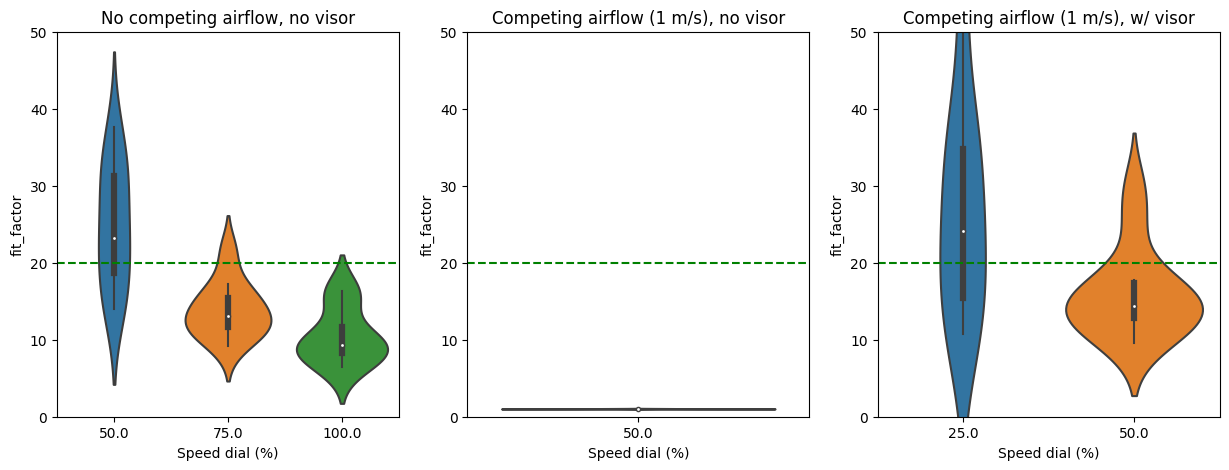

In [7]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.violinplot(data=csv_metadata[
    (csv_metadata['competing airflow (m/s)'] == '0') & \
    (csv_metadata['visor'] == '0')
], x='Speed dial (%)', y='fit_factor', ax=ax[0])
ax[0].set_title("No competing airflow, no visor")

sns.violinplot(data=csv_metadata[
    (csv_metadata['competing airflow (m/s)'] == '1') & \
    (csv_metadata['visor'] == '0')
], x='Speed dial (%)', y='fit_factor', ax=ax[1])

ax[1].set_title("Competing airflow (1 m/s), no visor")

sns.violinplot(data=csv_metadata[
    (csv_metadata['competing airflow (m/s)'] == '1') & \
    (csv_metadata['visor'] == '1')
], x='Speed dial (%)', y='fit_factor', ax=ax[2])

ax[2].set_title("Competing airflow (1 m/s), w/ visor")

for axis in ax:
    axis.set_ylim((0,50))
    axis.axhline(20, linestyle='--', color='g')

    #axis.set_xlim((40,110))
    #axis.legend(["",'N95 lower bound (95% reduction)'])

### Fit Factor Scatterplot

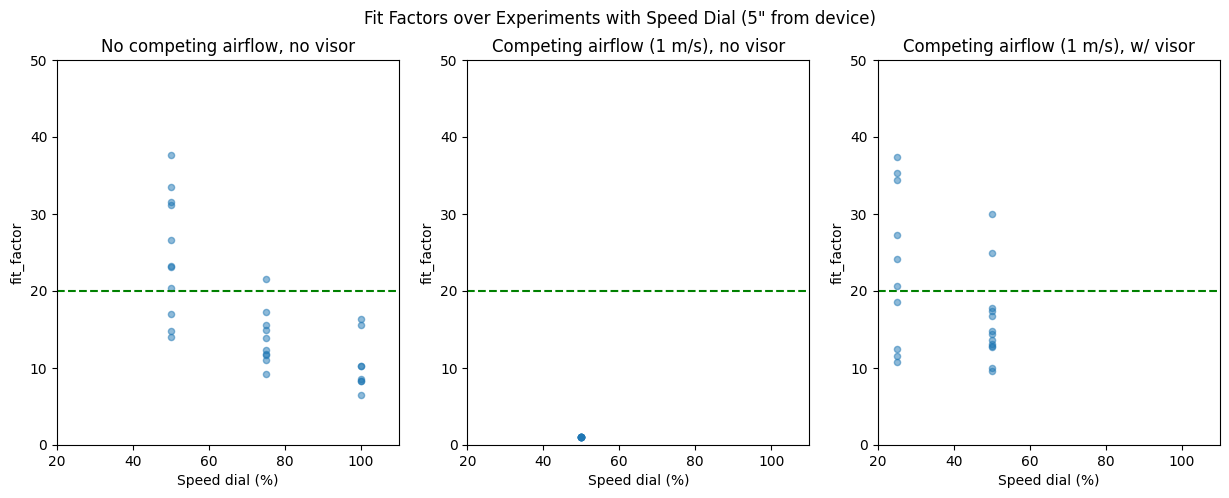

In [8]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
fig.suptitle('Fit Factors over Experiments with Speed Dial (5" from device)')
alpha=0.5

ax[0].set_title("No competing airflow, no visor")
csv_metadata[
    (csv_metadata['competing airflow (m/s)'] == '0') & \
    (csv_metadata['visor'] == '0')
][['Speed dial (%)', 'fit_factor']].plot.scatter(x='Speed dial (%)', y='fit_factor', ax=ax[0], alpha=alpha)

ax[1].set_title("Competing airflow (1 m/s), no visor")
csv_metadata[
    (csv_metadata['competing airflow (m/s)'] == '1') &
    (csv_metadata['visor'] == '0')
][['Speed dial (%)', 'fit_factor']].plot.scatter(x='Speed dial (%)', y='fit_factor', ax=ax[1],alpha=alpha)

ax[2].set_title("Competing airflow (1 m/s), w/ visor")
csv_metadata[
    (csv_metadata['competing airflow (m/s)'] == '1') &
    (csv_metadata['visor'] == '1')
][['Speed dial (%)', 'fit_factor']].plot.scatter(x='Speed dial (%)', y='fit_factor', ax=ax[2], alpha=alpha)

for axis in ax:
    axis.set_ylim((0,50))
    axis.axhline(20, linestyle='--', color='g')
    axis.set_xlim((20,110))
#ax.legend(['no competing airflow (0 m/s), no visor', 'competing airflow (1 m/s), no visor', 'competing airflow (1 m/s), w/ visor', 'N95 lower bound (95% reduction)', '2 CR Boxes on Max + Universal Cloth (90% reduction)'])

## Loudness

Here are loudness levels as measured with an iPhone microphone. Measurements were taken 5 inches directly above the device, where the ears would generally be located. This is to simulate the effect of hearing the device in the point of view of the wearer. Playable recordings were recorded using the VoiceMemo app, so people can judge how relatively loud one setting is compared to other settings.

<table>
    <thead>
        <tr>
            <th>Speed Dial (%)</th>
            <th>Average Loudness (dB)</th>
            <th>Play Button</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>25</td>
            <td>48.6</td>
            <td><audio controls src="https://breathesafe-airgo.s3.us-east-2.amazonaws.com/images/Airgo%2C+25%25+speed.m4a"></td>
        </tr>
        <tr>
            <td>50</td>
            <td>56.7</td>
            <td><audio controls src="https://breathesafe-airgo.s3.us-east-2.amazonaws.com/images/Airgo%2C+50%25+speed.m4a"></td>
        </tr>
        <tr>
            <td>75</td>
            <td>60.6</td>
            <td><audio controls src="https://breathesafe-airgo.s3.us-east-2.amazonaws.com/images/Airgo%2C+75%25+Speed.m4a"></td>
        </tr>
        <tr>
            <td>100</td>
            <td>62.2</td>
            <td><audio controls src="https://breathesafe-airgo.s3.us-east-2.amazonaws.com/images/AirGo%2C+100%25+Speed.m4a"></td>
        </tr>             
    </tbody>
</table>


## CADR estimates

In [9]:
readings = pd.read_csv('../air_cleaner_data/airgo/anemometer_data.csv')

### Air Delivery Rates Sampled Over Different Areas of the Filter

As expected, there's unevenness in the flow through the filter. There's higher flow on the side closest to the outlet of the blower fan, regardless of the speed dial setting. This could be remedied by building some "air guide" in the outlet that more evenly disperses the air to the rest of the filter. Could be done at a later time.

Text(0.5, 1.0, 'Speed Dial (%)-to-Flow (m/s) Spatial Relationships')

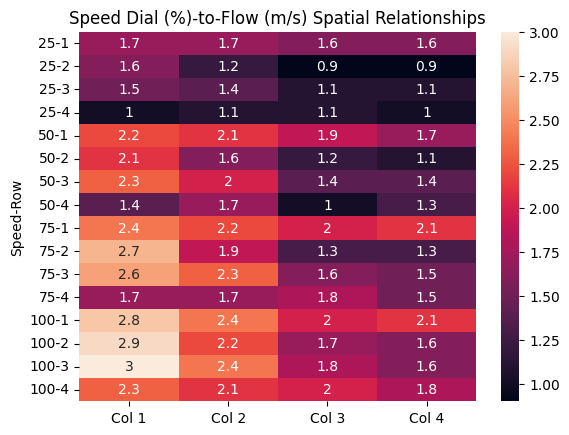

In [10]:
fig, ax = plt.subplots()
sns.heatmap(
    readings.set_index(['Speed','Row'])[['Col 1', 'Col 2', 'Col 3','Col 4']],
    annot=True,
    ax=ax
)
ax.set_title(
    'Speed Dial (%)-to-Flow (m/s) Spatial Relationships'
)

In [11]:
speed_estimates = readings.groupby('Speed').sum()[['Col 1', 'Col 2', 'Col 3', 'Col 4']].sum(axis=1) / 16 

In [18]:
length = 100 # millimeters
width = 90 # millimeters
area = length * width / 1000000 # square meters

In [51]:
readings

,Speed,Row,Col 1,Col 2,Col 3,Col 4,Average
0,25,1,1.7,1.7,1.6,1.6,NaN
1,25,2,1.6,1.2,0.9,0.9,NaN
2,25,3,1.5,1.4,1.1,1.1,NaN
3,25,4,1.0,1.1,1.1,1.0,NaN
4,50,1,2.2,2.1,1.9,1.7,NaN
5,50,2,2.1,1.6,1.2,1.1,NaN
6,50,3,2.3,2.0,1.4,1.4,NaN
7,50,4,1.4,1.7,1.0,1.3,NaN
8,75,1,2.4,2.2,2.0,2.1,NaN
9,75,2,2.7,1.9,1.3,1.3,NaN


In [19]:
cubic_feet_per_minute = compute_cadr(
    df=readings,
    number_of_readings_per_grouping=16,
    column_names=['Col 1', 'Col 2', 'Col 3', 'Col 4'],
    groupby_cols=['Speed'],
    filter_area_sq_meters=area,
    single_pass_filtration_efficiency=0.95
)

In [20]:
cubic_feet_per_minute

Speed
25     23.211690
50     29.892128
75     34.647694
100    39.290032
dtype: float64

### Gut Check

The [GDSTIME blower fan Amazon page](https://www.amazon.com/GDSTIME-Brushless-4-72x4-72x1-26-Inflatables-Ventilation/dp/B089Y3QPYF/ref=sr_1_6?keywords=gdstime+120mm+blower+fan&qid=1693407484&sprefix=gdstime+120mm%2Caps%2C118&sr=8-6) says the air delivery rate is 35 CFM. If they are right, then I am off by about 4 CFM when running the device at 100% speed. 

## Taking into account the error from Kestrel Anemometer

Kestrel Anemometer could be off by +/- 0.1 m/s, according to the specs sheet. I use a probabilistic (Bayesian) approach to estimate the how precise this estimate is. I assume that each measurement is unbiased, but can be off by +/- 0.1 m/s. I assume a normal distribution with the mean being the measurement, and the standard deviation being some value such that most of the distribution is between 0.1 m/s of the actual value.



In [72]:
simulations = []
for i in range(1000):
    copy = readings.copy()
    
    for col in ('Col 1', 'Col 2', 'Col 3', 'Col 4'):
        copy.loc[:, col] = readings[['Col 1', 'Col 2', 'Col 3', 'Col 4']].copy() + \
        pd.DataFrame(np.random.normal(0, 0.03, (16,4))).rename(columns={0: 'Col 1', 1: 'Col 2', 2: 'Col 3', 3: 'Col 4'})
    
    cubic_feet_per_minute_sim = compute_cadr(
        df=copy,
        number_of_readings_per_grouping=16,
        column_names=['Col 1', 'Col 2', 'Col 3', 'Col 4'],
        groupby_cols=['Speed'],
        filter_area_sq_meters=area,
        single_pass_filtration_efficiency=0.95
    )

    simulations.append(cubic_feet_per_minute_sim)

In [75]:
simul_df = pd.DataFrame(simulations)

In [76]:
simul_df.min()

Speed
25     22.722351
50     29.361787
75     34.190180
100    38.815360
dtype: float64

In [77]:
simul_df.max()

Speed
25     23.690515
50     30.314076
75     35.069407
100    39.710671
dtype: float64

In [79]:
y_err = simul_df.max() - simul_df.min()

<Axes: title={'center': 'Speed Dial (%) vs CADR (CFM)'}, xlabel='Speed'>

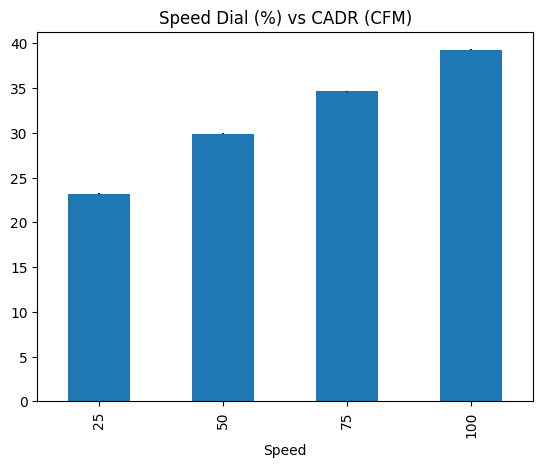

In [80]:
fig, ax = plt.subplots(1,1)
ax.set_title("Speed Dial (%) vs CADR (CFM)")
cubic_feet_per_minute.plot.bar(ax=ax, yerr=yerr)